/Users/xren/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




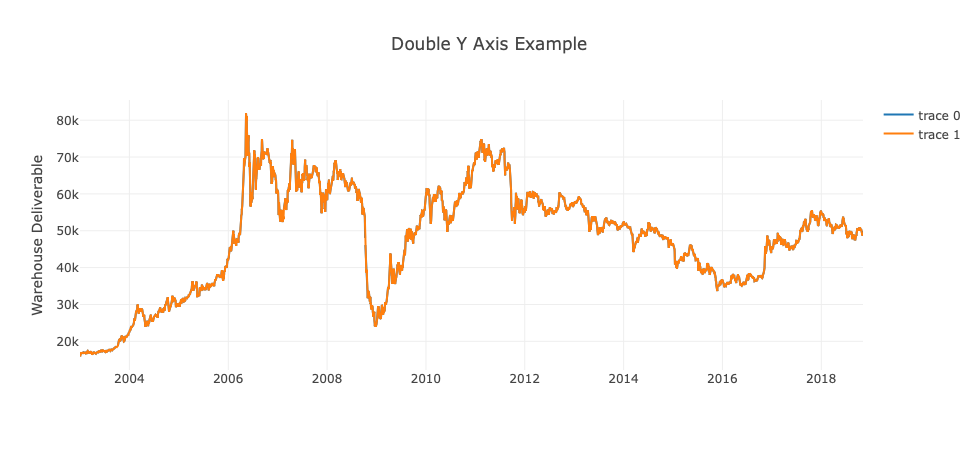

In [2]:
df = pd.read_pickle('data/SCFcMX')['2003':]
df2 = pd.read_pickle('data/SCFMX')['2003':]

data = [go.Line(x=df.index, y=df.SCFc01),
        go.Line(x=df2.index, y=df2['0']),
       ]
layout = go.Layout(
    title='Double Y Axis Example',
    yaxis=dict(
        title='Warehouse Deliverable'
    ),
    yaxis2=dict(
        title='Spread',
        overlaying='y',
        side='right'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

/Users/xren/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




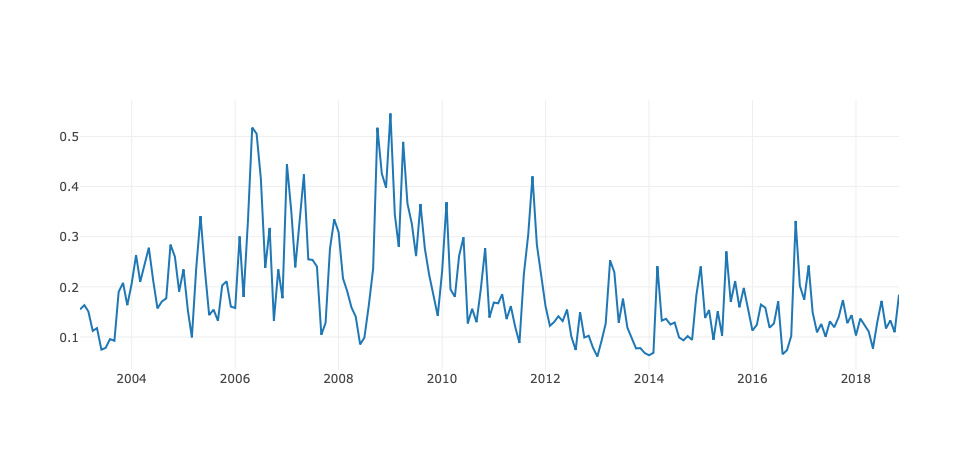

In [127]:
r = df['SCFc01'].dropna().pct_change()
r = r.groupby([r.index.year.rename('year'), r.index.month.rename('month')]).std(ddof=1)*(252**.5)

iplot(go.Figure(data=[go.Line(x=pd.to_datetime(dict(year=r.index.get_level_values(0), month=r.index.get_level_values(1), day=1))
                              , y=r)]))



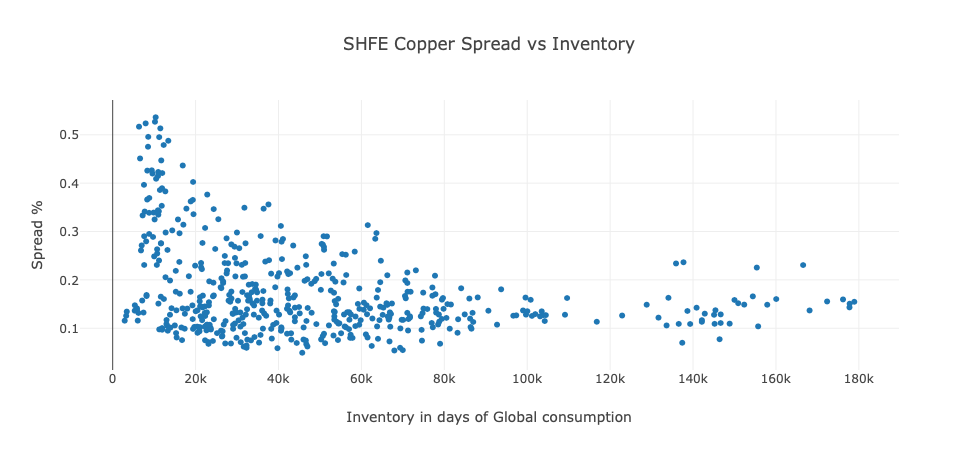

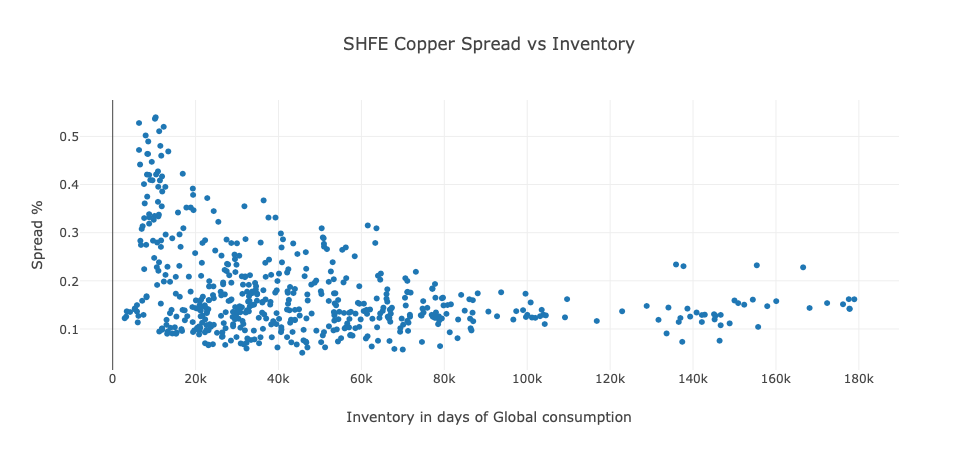

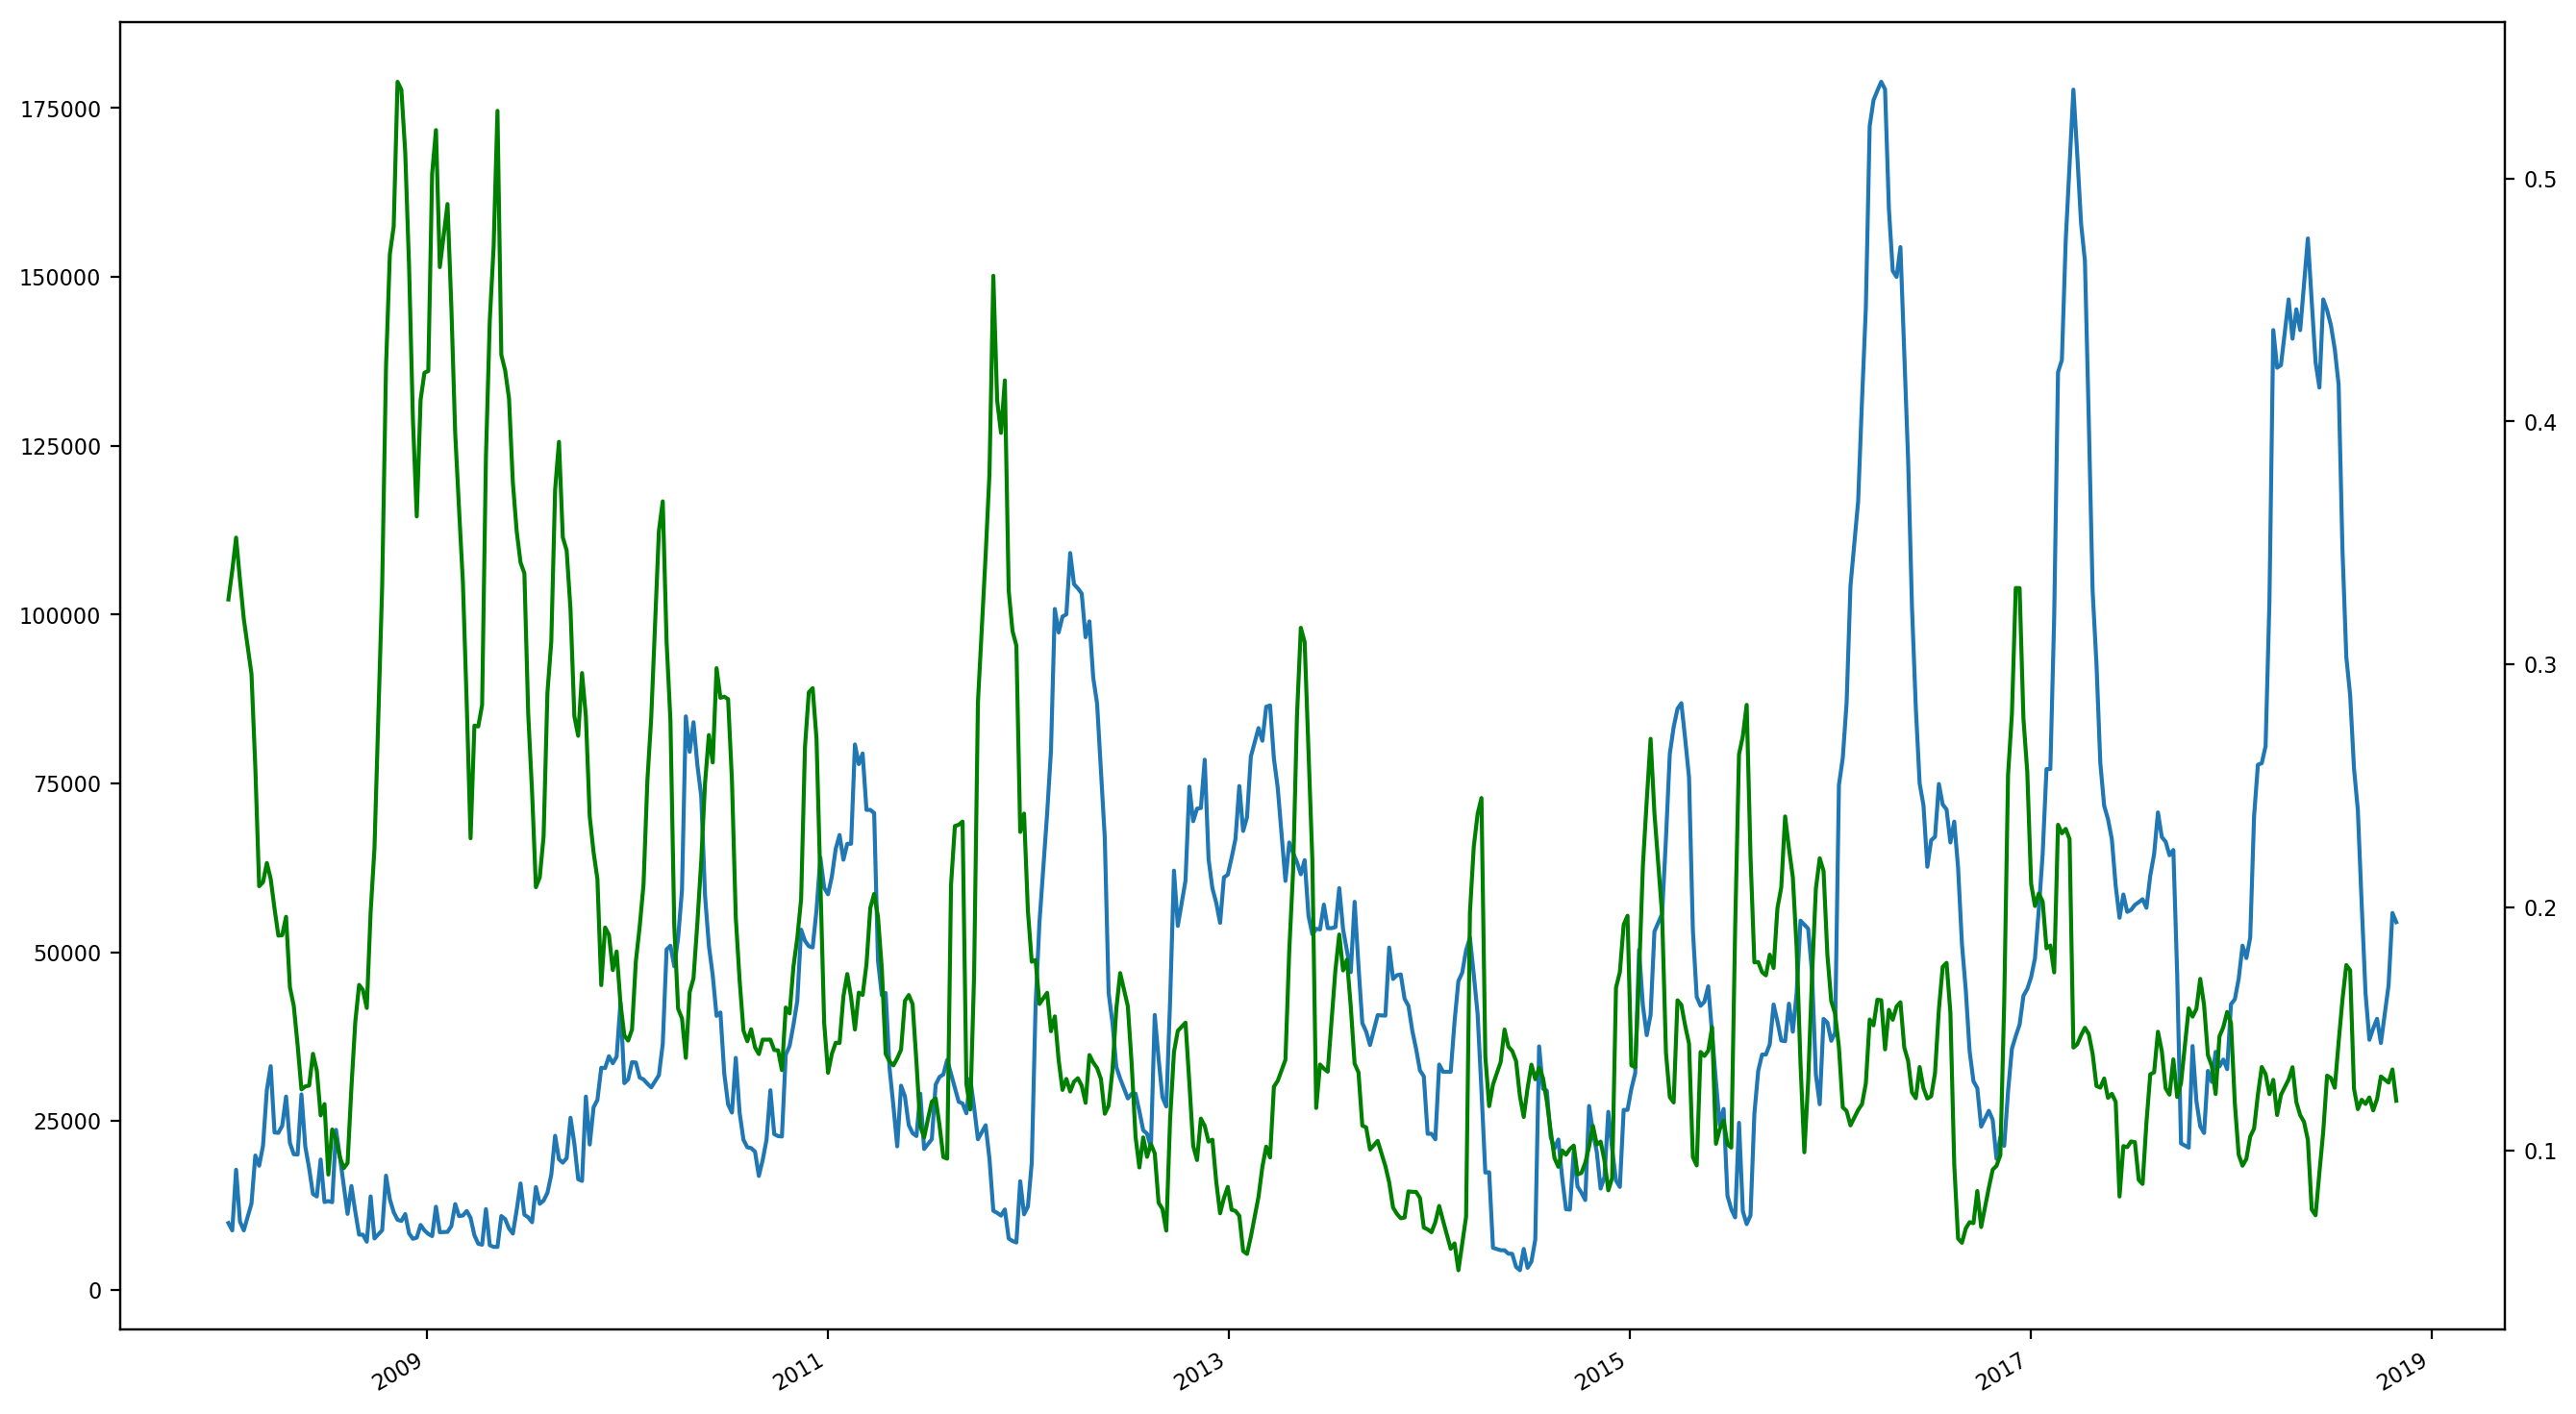

In [36]:
r = pd.read_pickle('data/SCFc-fc-px').SCFc01.pct_change()
vol = (r.rolling(20).std()*np.sqrt(252))
inv = pd.read_pickle('data/inventory.pkl').dropna()
inv['vol'] = vol


iplot(go.Figure(data=[go.Scatter(x=inv['SHFE On Warrant'], y=inv.vol, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))

r = pd.read_pickle('data/SCFc-fc-px').SCFc01.pct_change()
vol = (r.rolling(20).std()*np.sqrt(252)).resample('W').mean()
inv = pd.read_pickle('data/inventory.pkl').resample('W').mean().dropna()
inv['vol'] = vol

inv.vol.plot(ax = inv['SHFE On Warrant'].plot().twinx(), color='g')


# iplot(go.Figure(data=[
#                         go.Scatter(x=psi.index, y=psi.SCFc07, name='psi', yaxis='y2'), 
# #                        go.Scatter(x=lme.index, y=lme.volume), 
#                         go.Scatter(x=px.index, y=px.SCFc01), 
#                         go.Scatter(x=v.index, y=v.OnWarrant), 
#                         go.Scatter(x=inv.index, y=inv.Total), 
# #                        go.Scatter(x=comb.index, y=comb.stock),
# #                        go.Scatter(x=vol.index, y=vol.values, name='vol', yaxis='y2'),
#                      ],
#      layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
#                       xaxis=dict(title='Inventory in days of Global consumption'),
#                       yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))

#iplot(go.Figure(data=[
#                        go.Scatter(x=v.index, y=v.OnWarrant), 
#                        go.Scatter(x=psi.index, y=psi.vol, name='vol', yaxis='y2'),
#                     ],
#     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
#                      xaxis=dict(title='Inventory in days of Global consumption'),
#                      yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))

iplot(go.Figure(data=[go.Scatter(x=inv['SHFE On Warrant'], y=inv.vol, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'),yaxis2=dict(title='Spread', overlaying='y', side='right'))))
